In [65]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

In [3]:
URL='https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page=requests.get(URL)
soupdata=BeautifulSoup(page.text)
soupdata

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/><link href="https://img1a.flixcart.com" rel="dns-prefetch"/><link href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.3d34a6.css" rel="stylesheet"/><link as="image" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_f64bb3.png" rel="preload"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-

In [5]:
for link in soupdata.find_all('a'):
    print(link.get('href'))

/
/plus
/account/login?ret=/search%3Fq%3Dlaptops%26otracker%3Dsearch%26otracker1%3Dsearch%26marketplace%3DFLIPKART%26as-show%3Don%26as%3Doff
/viewcart?otracker=Cart_Icon_Click
/laptops/~cs-dcw2fh3nln/pr?sid=6bo%2Cb5g&collection-tab-name=Best%20Gamingdcw2fh3nln&otracker=sp_browse_announcement_search.flipkart.com
/computers/pr?sid=6bo&q=laptops&otracker=categorytree
/laptops/pr?sid=6bo,b5g&q=laptops&otracker=categorytree
/buying-guide/laptops?sid=6bo,b5g&otracker=bg_from_browse_lhs
/
/computers/pr?sid=6bo&marketplace=FLIPKART
/laptops/pr?sid=6bo,b5g&marketplace=FLIPKART
/hp-14-core-i5-10th-gen-8-gb-512-gb-ssd-windows-10-home-14-ck2018tu-thin-light-laptop/p/itm0b2aab6f42997?pid=COMFVD2WVZWBNKZA&lid=LSTCOMFVD2WVZWBNKZAP4TG2S&marketplace=FLIPKART&spotlightTagId=BestsellerId_6bo%2Fb5g&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=36091b56-1e51-4982-a386-ad94130273bd.COMFVD2WVZWBNKZA.SEARCH&ssid=9ckhfhhe800000001612607222207&qH=c06ea84a1e3dc3c6
/asus-core-i3-10th-gen-4-gb-512-gb-

### Flipkart Web Scrapping

Extracting for 1 page

In [27]:
class_name='_4rR01T'
class_features='rgWa7D'
class_rating='_3LWZlK'
class_price='_30jeq3 _1_WHN1'
main_class='_3pLy-c row'

name=[]
price=[]
rating=[]
features=[]

for x in soupdata.find_all('div',attrs={'class':main_class}):
    laptop_name=x.find('div',attrs={'class':class_name}).text
    laptop_price=x.find('div',attrs={'class':class_price}).text
    laptop_rating=x.find('div',attrs={'class':class_rating}).text
    laptop_features=x.find_all('li',attrs={'class':class_features})
     
    this_laptop_features=''
    for item in laptop_features:
        this_laptop_features+=item.text+'\n'
    name.append(laptop_name)
    price.append(laptop_price)
    rating.append(laptop_rating)
    features.append(laptop_features)

    

Extracting for all the pages

In [87]:
name=[]
price=[]
rating=[]
features=[]

class_name='_4rR01T'
class_features='rgWa7D'
class_rating='_3LWZlK'
class_price='_30jeq3 _1_WHN1'
main_class='_3pLy-c row'

for i in range(15):
    url='https://www.flipkart.com/search?q=laptops&marketplace=FLIPKART&as-show=on&as=off&page='+str(i)
    page=requests.get(url)
    soupdata=BeautifulSoup(page.text)
    
    for x in soupdata.find_all('div',attrs={'class':main_class}):
        try:
            laptop_name=x.find('div',attrs={'class':class_name}).text
        except AttributeError:
            laptop_name=np.NaN
            
        try:  
            laptop_price=x.find('div',attrs={'class':class_price}).text
        except AttributeError:
            laptop_price=np.NaN
            
        try:    
            laptop_rating=x.find('div',attrs={'class':class_rating}).text
        except AttributeError:
            laptop_rating=np.NaN
            
        try:    
            laptop_features=x.find_all('li',attrs={'class':class_features})
        except AttributeError:
            laptop_features=np.Nan
        try:    
            this_laptop_features=''
            for item in laptop_features:
                this_laptop_features+=item.text+'\n'
        except AttributeError:
            laptop_features=np.NaN
            
        name.append(laptop_name)
        price.append(laptop_price)
        rating.append(laptop_rating)
        features.append(this_laptop_features)
    print('parsing page'+ str(i))


parsing page0
parsing page1
parsing page2
parsing page3
parsing page4
parsing page5
parsing page6
parsing page7
parsing page8
parsing page9
parsing page10
parsing page11
parsing page12
parsing page13
parsing page14


### Creating Data frame

In [88]:
df=pd.DataFrame({'Product':name,'Price':price,'Rating':rating,'Features':features})

In [89]:
print(df.shape)
df.head()

(360, 4)


,Product,Price,Rating,Features
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,"₹47,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,"₹36,990",4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,"₹44,990",4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,"₹59,990",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,"₹26,990",4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...


In [90]:
df.to_csv('Flipkart')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   360 non-null    object
 1   Price     360 non-null    object
 2   Rating    275 non-null    object
 3   Features  360 non-null    object
dtypes: object(4)
memory usage: 11.4+ KB


### Creating new features from the available features

In [92]:
regex = r'^\w+'
df['Processor'] = df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [93]:
df.head()

,Product,Price,Rating,Features,Processor
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,"₹47,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel]
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,"₹36,990",4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...,[Intel]
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,"₹44,990",4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...,[AMD]
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,"₹59,990",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...,[AMD]
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,"₹26,990",4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...,[Intel]
...,...,...,...,...,...
355,Avita Pura Core i3 8th Gen - (4 GB/256 GB SSD/...,"₹29,990",4.2,Intel Core i3 Processor (8th Gen)\n4 GB DDR3 R...,[Intel]
356,Avita Liber V14 Ryzen 5 Quad Core 3500U - (8 G...,"₹38,990",4.2,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...,[AMD]
357,Asus ExpertBook P2 Core i5 10th Gen - (8 GB/1 ...,"₹83,990",NaN,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel]
358,Acer Swift 7 Core i5 7th Gen - (8 GB/256 GB SS...,"₹69,990",4.5,Intel Core i5 Processor (7th Gen)\n8 GB DDR3 R...,[Intel]


In [94]:
regex = r'[AMD|Intel][\sA-Za-z0-9]+ Processor'
df['ProcessorDetails'] = df['Features'].apply(lambda x:re.compile(regex).findall(x))
df.head()

,Product,Price,Rating,Features,Processor,ProcessorDetails
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,"₹47,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor]
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,"₹36,990",4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...,[Intel],[Intel Core i3 Processor]
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,"₹44,990",4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...,[AMD],[AMD Ryzen 5 Quad Core Processor]
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,"₹59,990",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Hexa Core Processor]
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,"₹26,990",4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...,[Intel],[Intel Pentium Gold Processor]
...,...,...,...,...,...,...
355,Avita Pura Core i3 8th Gen - (4 GB/256 GB SSD/...,"₹29,990",4.2,Intel Core i3 Processor (8th Gen)\n4 GB DDR3 R...,[Intel],[Intel Core i3 Processor]
356,Avita Liber V14 Ryzen 5 Quad Core 3500U - (8 G...,"₹38,990",4.2,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Quad Core Processor]
357,Asus ExpertBook P2 Core i5 10th Gen - (8 GB/1 ...,"₹83,990",NaN,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor]
358,Acer Swift 7 Core i5 7th Gen - (8 GB/256 GB SS...,"₹69,990",4.5,Intel Core i5 Processor (7th Gen)\n8 GB DDR3 R...,[Intel],[Intel Core i5 Processor]


In [95]:
regex = r'[0-9][\sA-Za-z0-9]+RAM'
df['RAM'] = df['Features'].apply(lambda x:re.compile(regex).findall(x))
df

,Product,Price,Rating,Features,Processor,ProcessorDetails,RAM
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,"₹47,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM]
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,"₹36,990",4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...,[Intel],[Intel Core i3 Processor],[4 GB DDR4 RAM]
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,"₹44,990",4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...,[AMD],[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM]
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,"₹59,990",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Hexa Core Processor],[5 Hexa Core Processor\n8 GB DDR4 RAM]
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,"₹26,990",4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...,[Intel],[Intel Pentium Gold Processor],[4 GB DDR4 RAM]
...,...,...,...,...,...,...,...
355,Avita Pura Core i3 8th Gen - (4 GB/256 GB SSD/...,"₹29,990",4.2,Intel Core i3 Processor (8th Gen)\n4 GB DDR3 R...,[Intel],[Intel Core i3 Processor],[4 GB DDR3 RAM]
356,Avita Liber V14 Ryzen 5 Quad Core 3500U - (8 G...,"₹38,990",4.2,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Quad Core Processor],[5 Quad Core Processor\n8 GB DDR4 RAM]
357,Asus ExpertBook P2 Core i5 10th Gen - (8 GB/1 ...,"₹83,990",NaN,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM]
358,Acer Swift 7 Core i5 7th Gen - (8 GB/256 GB SS...,"₹69,990",4.5,Intel Core i5 Processor (7th Gen)\n8 GB DDR3 R...,[Intel],[Intel Core i5 Processor],[8 GB DDR3 RAM]


In [96]:
regex = r'[0-9]+[\s]bit[\s][Windows|Mac]+[\s0-9]+Operating System'
df['OS'] = df['Features'].apply(lambda x:re.compile(regex).findall(x))
df.head()

,Product,Price,Rating,Features,Processor,ProcessorDetails,RAM,OS
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,"₹47,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,"₹36,990",4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...,[Intel],[Intel Core i3 Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System]
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,"₹44,990",4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...,[AMD],[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,"₹59,990",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Hexa Core Processor],[5 Hexa Core Processor\n8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,"₹26,990",4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...,[Intel],[Intel Pentium Gold Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System]
...,...,...,...,...,...,...,...,...
355,Avita Pura Core i3 8th Gen - (4 GB/256 GB SSD/...,"₹29,990",4.2,Intel Core i3 Processor (8th Gen)\n4 GB DDR3 R...,[Intel],[Intel Core i3 Processor],[4 GB DDR3 RAM],[64 bit Windows 10 Operating System]
356,Avita Liber V14 Ryzen 5 Quad Core 3500U - (8 G...,"₹38,990",4.2,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Quad Core Processor],[5 Quad Core Processor\n8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
357,Asus ExpertBook P2 Core i5 10th Gen - (8 GB/1 ...,"₹83,990",NaN,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
358,Acer Swift 7 Core i5 7th Gen - (8 GB/256 GB SS...,"₹69,990",4.5,Intel Core i5 Processor (7th Gen)\n8 GB DDR3 R...,[Intel],[Intel Core i5 Processor],[8 GB DDR3 RAM],[64 bit Windows 10 Operating System]


In [98]:
regex = r'^\w+'
df['Brand'] = df['Product'].apply(lambda x:re.compile(regex).findall(x))
df.head()

,Product,Price,Rating,Features,Processor,ProcessorDetails,RAM,OS,Brand
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,"₹47,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[HP]
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,"₹36,990",4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...,[Intel],[Intel Core i3 Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[Asus]
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,"₹44,990",4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...,[AMD],[AMD Ryzen 5 Quad Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[Asus]
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,"₹59,990",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Hexa Core Processor],[5 Hexa Core Processor\n8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[Lenovo]
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,"₹26,990",4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...,[Intel],[Intel Pentium Gold Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[HP]
...,...,...,...,...,...,...,...,...,...
355,Avita Pura Core i3 8th Gen - (4 GB/256 GB SSD/...,"₹29,990",4.2,Intel Core i3 Processor (8th Gen)\n4 GB DDR3 R...,[Intel],[Intel Core i3 Processor],[4 GB DDR3 RAM],[64 bit Windows 10 Operating System],[Avita]
356,Avita Liber V14 Ryzen 5 Quad Core 3500U - (8 G...,"₹38,990",4.2,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...,[AMD],[AMD Ryzen 5 Quad Core Processor],[5 Quad Core Processor\n8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[Avita]
357,Asus ExpertBook P2 Core i5 10th Gen - (8 GB/1 ...,"₹83,990",NaN,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,[Intel],[Intel Core i5 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[Asus]
358,Acer Swift 7 Core i5 7th Gen - (8 GB/256 GB SS...,"₹69,990",4.5,Intel Core i5 Processor (7th Gen)\n8 GB DDR3 R...,[Intel],[Intel Core i5 Processor],[8 GB DDR3 RAM],[64 bit Windows 10 Operating System],[Acer]


In [99]:
df['Processor'] = df['Processor'].apply(lambda x : ''.join(x))
df['ProcessorDetails'] = df['ProcessorDetails'].apply(lambda x : ''.join(x))
df['RAM'] = df['RAM'].apply(lambda x : ''.join(x))
df['OS'] = df['OS'].apply(lambda x : ''.join(x))
df['Brand'] = df['Brand'].apply(lambda x : ''.join(x))

In [100]:
df.head()

,Product,Price,Rating,Features,Processor,ProcessorDetails,RAM,OS,Brand
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,"₹47,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,HP
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,"₹36,990",4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...,Intel,Intel Core i3 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,Asus
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,"₹44,990",4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...,AMD,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,Asus
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,"₹59,990",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...,AMD,AMD Ryzen 5 Hexa Core Processor,5 Hexa Core Processor\n8 GB DDR4 RAM,64 bit Windows 10 Operating System,Lenovo
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,"₹26,990",4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,HP
...,...,...,...,...,...,...,...,...,...
355,Avita Pura Core i3 8th Gen - (4 GB/256 GB SSD/...,"₹29,990",4.2,Intel Core i3 Processor (8th Gen)\n4 GB DDR3 R...,Intel,Intel Core i3 Processor,4 GB DDR3 RAM,64 bit Windows 10 Operating System,Avita
356,Avita Liber V14 Ryzen 5 Quad Core 3500U - (8 G...,"₹38,990",4.2,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...,AMD,AMD Ryzen 5 Quad Core Processor,5 Quad Core Processor\n8 GB DDR4 RAM,64 bit Windows 10 Operating System,Avita
357,Asus ExpertBook P2 Core i5 10th Gen - (8 GB/1 ...,"₹83,990",NaN,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,Asus
358,Acer Swift 7 Core i5 7th Gen - (8 GB/256 GB SS...,"₹69,990",4.5,Intel Core i5 Processor (7th Gen)\n8 GB DDR3 R...,Intel,Intel Core i5 Processor,8 GB DDR3 RAM,64 bit Windows 10 Operating System,Acer


In [101]:
df['Price'] = df['Price'].apply(lambda x : x.replace('₹','').replace(',','')).astype(float)
df['Rating'] = df['Rating'].astype(float)

In [103]:
df.head()

,Product,Price,Rating,Features,Processor,ProcessorDetails,RAM,OS,Brand
0,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,47490.0,4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,HP
1,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,36990.0,4.4,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...,Intel,Intel Core i3 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,Asus
2,Asus VivoBook 14 Ryzen 5 Quad Core 3500U 2nd G...,44990.0,4.4,AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 G...,AMD,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,Asus
3,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...,59990.0,4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...,AMD,AMD Ryzen 5 Hexa Core Processor,5 Hexa Core Processor\n8 GB DDR4 RAM,64 bit Windows 10 Operating System,Lenovo
4,HP 15s Pentium Gold - (4 GB/1 TB HDD/Windows 1...,26990.0,4.1,Intel Pentium Gold Processor\n4 GB DDR4 RAM\n6...,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,HP


In [106]:
df['Product'][1]

'Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windows 10 Home) X413JA-EK267T Thin and Light Laptop'

In [109]:
df['Features'][2]

'AMD Ryzen 5 Quad Core Processor (2nd Gen)\n8 GB DDR4 RAM\n64 bit Windows 10 Operating System\n512 GB SSD\n35.56 cm (14 inch) Display\nAsus Giftbox, Asus Live Update\n1 Year Limited International Hardware Warranty\n'

In [107]:
df.nunique()

Product             295
Price               168
Rating               18
Features            266
Processor             8
ProcessorDetails     26
RAM                  24
OS                    3
Brand                16
dtype: int64

In [111]:
laptop_data=df.drop(['Product','Features'],axis=1)
laptop_data.head()

,Price,Rating,Processor,ProcessorDetails,RAM,OS,Brand
0,47490.0,4.2,Intel,Intel Core i5 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,HP
1,36990.0,4.4,Intel,Intel Core i3 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,Asus
2,44990.0,4.4,AMD,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,Asus
3,59990.0,4.5,AMD,AMD Ryzen 5 Hexa Core Processor,5 Hexa Core Processor\n8 GB DDR4 RAM,64 bit Windows 10 Operating System,Lenovo
4,26990.0,4.1,Intel,Intel Pentium Gold Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,HP


# EDA

In [112]:
laptop_data.dtypes

Price               float64
Rating              float64
Processor            object
ProcessorDetails     object
RAM                  object
OS                   object
Brand                object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C2D135A48>]],
      dtype=object)

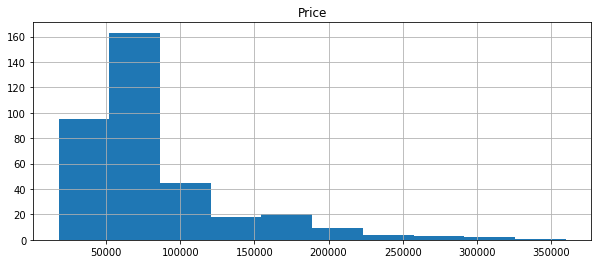

In [114]:
#Distribution of Price
laptop_data[['Price']].hist(figsize=(10,4))

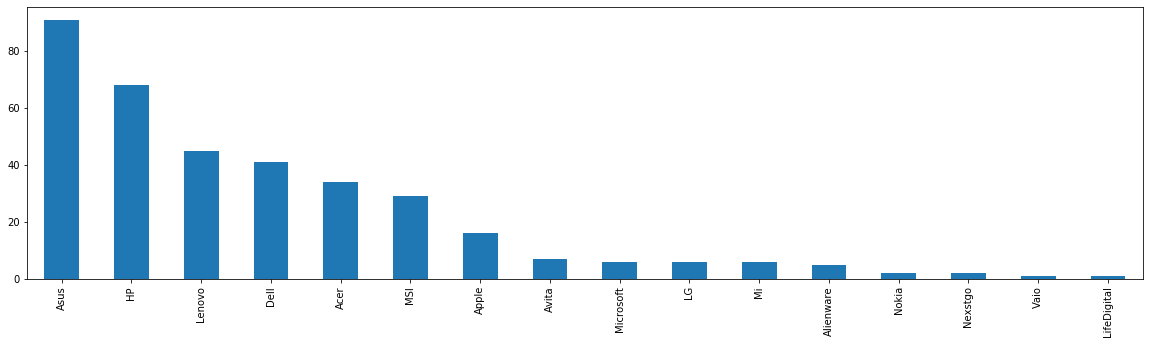

In [122]:
#Checking the brand counts
laptop_data['Brand'].value_counts().plot(kind='bar',figsize=(20,5))

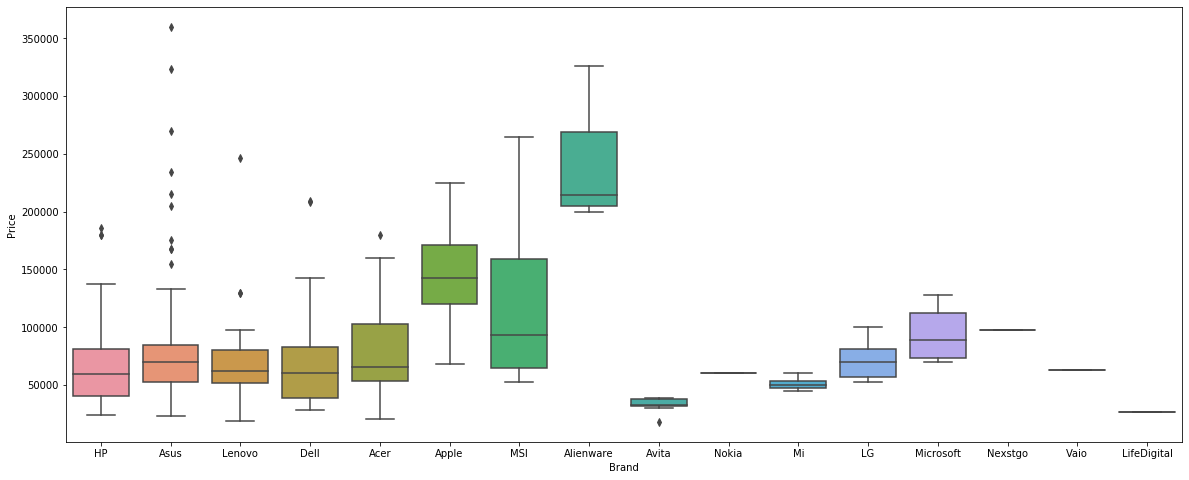

In [118]:
#Brand vs Price
plt.figure(figsize=(20,8))
sns.boxplot(x=laptop_data['Brand'],y=laptop_data['Price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C2C7F5B88>]],
      dtype=object)

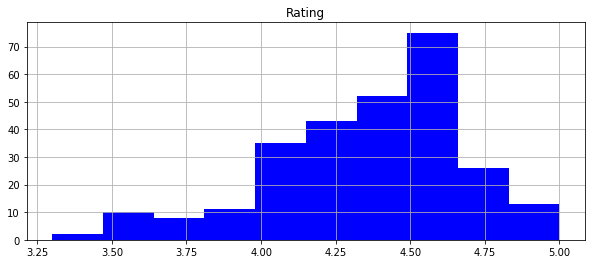

In [124]:
#Rating 
laptop_data[['Rating']].hist(figsize=(10,4),color='b')